# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Write Function

### 2.1 Normalization

In [2]:
def minmaxNorm(Data, _min, _max):
    Data_Norm = (Data - _min)/(_max - _min)
    return Data_Norm

In [3]:
def min4norm(Data):
    _min = Data.min(axis=0, keepdims = True)
    return _min

In [4]:
def max4norm(Data):
    _max = Data.max(axis=0, keepdims = True)
    return _max

### 2.2 วัดระยะห่างระหว่างข้อมูลแต่ละตัวใน Validation Set กับข้อมูลทุกตัวใน Training Set

In [5]:
def KNN_find_distance_each_data(X_Train, X_Valid):
    all_distance = []
    for x_valid in X_Valid:
        distance = KNN_find_distance(X_Train, x_valid)
        all_distance.append(distance)
    return all_distance

In [6]:
def KNN_find_distance(X_Train, x_valid):
    distance2 = ((X_Train - x_valid)**2).sum(axis=1)
    distance = np.sqrt(distance2)
    return distance

### 2.3 เรียงลำดับ Target ตามระยะห่าง

In [7]:
def KNN_find_sorted_target_each_data(Y_Train, all_distance):
    all_sorted_target = []
    for distance in all_distance:
        sorted_target = KNN_sort_target_by_distance(Y_Train, distance)
        all_sorted_target.append(sorted_target)
    return all_sorted_target

In [8]:
def KNN_sort_target_by_distance(Y_Train, distance):
    sorted_target = Y_Train[distance.argsort()]
    return sorted_target

### 2.4 หาผลลัพธ์จากเพื่อนบ้านที่ใกล้ที่สุด K ตัว

#### 2.4.1 KNN-C

In [9]:
def KNNC_find_class_each_data(all_sorted_target, K):
    all_class = []
    for sorted_target in all_sorted_target:
        _class = KNNC_find_class(sorted_target, K)
        all_class.append(_class)
    all_class = np.array(all_class).reshape(-1, 1)
    return all_class

In [10]:
def KNNC_find_class(sorted_target, K):
    unique, count_unique = np.unique(sorted_target[:K, :], return_counts = True)
    _class = unique[count_unique.argmax()]
    return _class

#### 2.4.2 KNN-R

In [11]:
def KNNR_find_value_each_data(all_sorted_target, K):
    all_value = []
    for sorted_target in all_sorted_target:
        value = KNNR_find_value(sorted_target, K)
        all_value.append(value)
    all_value = np.array(all_value).reshape(-1, 1)
    return all_value

In [12]:
def KNNR_find_value(sorted_target, K):
    value = sorted_target[:K, :].mean()
    return value

### 2.5 หา error ของ K แต่ละค่า และ หา K ที่ทำให้ error บน Validation Set ต่ำที่สุด

#### 2.5.1 KNN-C

In [13]:
def KNNC_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K):
    K_list = [K for K in range(min_K, max_K + 1)]
    error_list = []
    for K in K_list:
        K_all_class = KNNC_find_class_each_data(all_sorted_target, K)
        K_error = find_error_classification(Y_Valid, K_all_class)
        error_list.append(K_error)
    return K_list, error_list

In [14]:
def find_error_classification(Y, Yhat):
    N = Y.shape[0]
    error = (100/N)*(Y != Yhat).sum()
    return error

#### 2.5.2 KNN-R

In [15]:
def KNNR_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K):
    K_list = [K for K in range(min_K, max_K + 1)]
    error_list = []
    for K in K_list:
        K_all_value = KNNR_find_value_each_data(all_sorted_target, K)
        K_error = find_MAE(Y_Valid, K_all_value)
        error_list.append(K_error)
    return K_list, error_list

In [16]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [17]:
def KNN_find_best_K(K_list, error_list):
    K_list = np.array(K_list)
    error_list = np.array(error_list)
    plt.plot(K_list, error_list)
    plt.xlabel('K')
    plt.ylabel('Error')
    sorted_K = K_list[error_list.argsort()]
    error_list.sort()
    best_K = sorted_K[0]
    print(best_K)
    print()
    L = len(K_list)
    for l in range(L):
        print('K :', sorted_K[l], ', error :', error_list[l])
    return best_K

### 2.6 เรียนรู้

#### 2.6.1 KNN-C

In [18]:
def KNNC_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Valid_Norm = minmaxNorm(X_Valid, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Valid_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    K_list, error_list = KNNC_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K)
    best_K = KNN_find_best_K(K_list, error_list)
    return best_K

#### 2.6.2 KNN-R

In [19]:
def KNNR_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Valid_Norm = minmaxNorm(X_Valid, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Valid_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    K_list, error_list = KNNR_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K)
    best_K = KNN_find_best_K(K_list, error_list)
    return best_K

### 2.7 พยากรณ์

#### 2.7.1 KNN-C

In [20]:
def KNNC_predict(X_Train, Y_Train, X_Test, best_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Test_Norm = minmaxNorm(X_Test, _min, _max)
    #all_distance = KNN_find_distance_each_data(X_Train, X_Test)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Test_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    Yhat_Test = KNNC_find_class_each_data(all_sorted_target, best_K)
    return Yhat_Test

#### 2.7.2 KNN-R

In [21]:
def KNNR_predict(X_Train, Y_Train, X_Test, best_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Test_Norm = minmaxNorm(X_Test, _min, _max)
    #all_distance = KNN_find_distance_each_data(X_Train, X_Test)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Test_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    Yhat_Test = KNNR_find_value_each_data(all_sorted_target, best_K)
    return Yhat_Test

# 3. Read Data & Prepare Data

In [22]:
Data = pd.read_excel('EURUSD_D1_Dataset_Classification.xlsx', usecols = 'G:AK') #ดูราคาปิด 30 วัน ของ 21ปี

In [23]:
Data

,Delta30,Delta29,Delta28,Delta27,Delta26,Delta25,Delta24,Delta23,Delta22,Delta21,...,Delta9,Delta8,Delta7,Delta6,Delta5,Delta4,Delta3,Delta2,Delta1,Target
0,0.00930,-0.02400,0.02300,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,...,0.00030,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,Down
1,-0.02400,0.02300,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,...,0.00030,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,Down
2,0.02300,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,...,-0.00780,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,Down
3,0.00750,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,...,0.00970,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,-0.01060,Up
4,-0.00010,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,...,0.01020,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,-0.01060,0.00740,Down
5,-0.01060,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,...,0.00150,-0.00250,0.00050,0.00140,-0.00610,-0.00320,-0.01060,0.00740,-0.00080,Up
6,-0.00320,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,...,-0.00250,0.00050,0.00140,-0.00610,-0.00320,-0.01060,0.00740,-0.00080,0.00710,Down
7,-0.00730,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,...,0.00050,0.00140,-0.00610,-0.00320,-0.01060,0.00740,-0.00080,0.00710,-0.01160,Down
8,0.01590,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,...,0.00140,-0.00610,-0.00320,-0.01060,0.00740,-0.00080,0.00710,-0.01160,-0.00200,Down
9,-0.00090,0.00050,-0.01000,0.00030,-0.00630,0.00700,-0.00850,-0.00020,0.00470,-0.00250,...,-0.00610,-0.00320,-0.01060,0.00740,-0.00080,0.00710,-0.01160,-0.00200,-0.01320,Up


In [24]:
DataMatrix = Data.values

In [25]:
DataMatrix.shape

(5343, 31)

In [26]:
D = DataMatrix.shape[1] - 1

In [27]:
X = DataMatrix[:, :D]
X = np.array(X, dtype=np.float32)

In [28]:
Y = DataMatrix[:, D:]

In [29]:
start_train = 0
end_train = -300
end_valid = -150
end_test = -1

In [30]:
X_Train = X[start_train:end_train, :]
Y_Train = Y[start_train:end_train, :]

X_Valid = X[end_train:end_valid, :]
Y_Valid = Y[end_train:end_valid, :]

X_Test = X[end_valid:end_test, :]
Y_Test = Y[end_valid:end_test, :]

# 4. Create Model

In [31]:
min_K = 1
max_K = 30

12

K : 12 , error : 39.33333333333333
K : 11 , error : 40.0
K : 9 , error : 40.666666666666664
K : 13 , error : 42.666666666666664
K : 8 , error : 42.666666666666664
K : 22 , error : 43.33333333333333
K : 10 , error : 43.33333333333333
K : 20 , error : 43.33333333333333
K : 17 , error : 44.0
K : 25 , error : 44.0
K : 23 , error : 44.666666666666664
K : 24 , error : 44.666666666666664
K : 14 , error : 44.666666666666664
K : 21 , error : 44.666666666666664
K : 7 , error : 44.666666666666664
K : 1 , error : 44.666666666666664
K : 26 , error : 45.33333333333333
K : 28 , error : 45.33333333333333
K : 15 , error : 45.33333333333333
K : 18 , error : 45.33333333333333
K : 5 , error : 46.0
K : 27 , error : 46.0
K : 16 , error : 46.666666666666664
K : 19 , error : 46.666666666666664
K : 3 , error : 47.33333333333333
K : 6 , error : 48.0
K : 30 , error : 48.0
K : 29 , error : 50.0
K : 4 , error : 52.666666666666664
K : 2 , error : 54.0


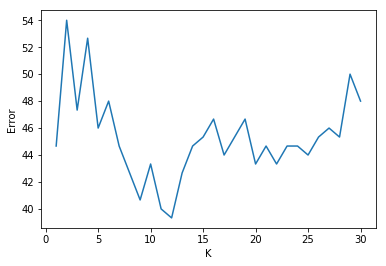

In [32]:
best_K = KNNC_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K)

# 5. Make Prediction

In [33]:
Yhat_Test = KNNC_predict(X_Train, Y_Train, X_Test, best_K) # best_K = 12

In [34]:
error_Test = find_error_classification(Y_Test, Yhat_Test)

In [35]:
error_Test

52.348993288590606

28

K : 28 , error : 43.624161073825505
K : 30 , error : 44.29530201342282
K : 26 , error : 45.63758389261745
K : 27 , error : 46.97986577181208
K : 29 , error : 46.97986577181208
K : 25 , error : 48.322147651006716
K : 24 , error : 48.99328859060403
K : 22 , error : 48.99328859060403
K : 5 , error : 49.664429530201346
K : 21 , error : 49.664429530201346
K : 23 , error : 51.006711409395976
K : 20 , error : 52.348993288590606
K : 19 , error : 52.348993288590606
K : 18 , error : 52.348993288590606
K : 16 , error : 52.348993288590606
K : 15 , error : 52.348993288590606
K : 12 , error : 52.348993288590606
K : 10 , error : 52.348993288590606
K : 13 , error : 53.02013422818792
K : 6 , error : 53.02013422818792
K : 11 , error : 53.691275167785236
K : 8 , error : 53.691275167785236
K : 4 , error : 53.691275167785236
K : 2 , error : 53.691275167785236
K : 9 , error : 54.36241610738255
K : 14 , error : 54.36241610738255
K : 1 , error : 54.36241610738255
K : 17 , error : 55.033557046979865
K : 3 

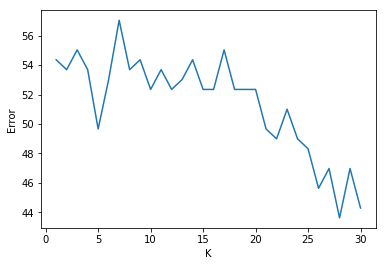

In [36]:
best_K = KNNC_fit(X_Train, Y_Train, X_Test, Y_Test, 1, 30)